Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [2]:
car_dataset=pd.read_csv('car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [9]:
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}},inplace=True)
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}},inplace=True)

In [10]:
print(car_dataset['Fuel_Type'])
print(car_dataset['Seller_Type'])
car_dataset['Transmission']

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Seller_Type, Length: 301, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Transmission, Length: 301, dtype: int64

Separating the Data and Label

In [12]:
X=car_dataset.drop(['Car_Name', 'Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting into Training and Testing data

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

In [14]:
lin_reg_model=LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [16]:
training_data_prediction=lin_reg_model.predict(X_train)

In [17]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error:',error_score)

R squared error: 0.8799451660493711


Visualize the Actual and Predicted Price

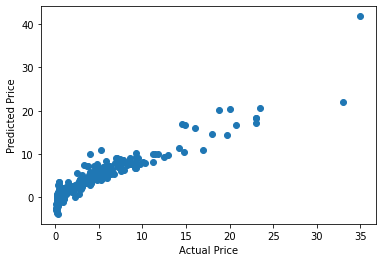

In [18]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [19]:
#prediction on testing data
test_data_prediction=lin_reg_model.predict(X_test)

In [20]:
#R squared error
error_score1=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score1)

R squared error: 0.8365766715027051


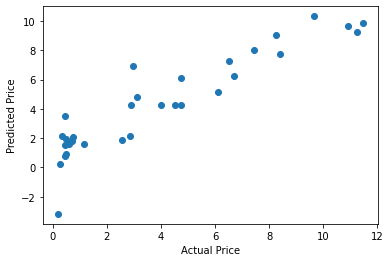

In [22]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Lasso Regression

In [23]:
lass_reg_model=Lasso()

In [24]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [25]:
training_data_prediction=lass_reg_model.predict(X_train)

In [26]:
#R squared error
error_score3=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error:',error_score3)

R squared error: 0.8427856123435794


Visualize the Actual and Predicted Price

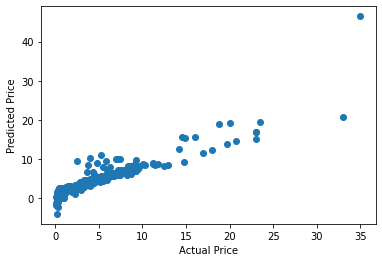

In [27]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [28]:
test_data_prediction=lass_reg_model.predict(X_test)

In [30]:
#R squared error
error_score4=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',error_score4)

R squared error: 0.8709167941173195


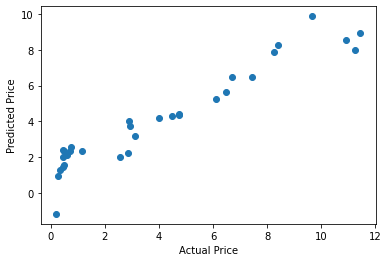

In [31]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()